# Много картиночек (и немного основ анализа данных)

В этом занятии мы будем еще больше работать с численными данными. Если вы чувствуете, что не до конца поняли прошлое занятие &mdash; можете вернутся к нему и задать вопросы на этой практике.


В этой практике мы научимся строить несколько новых типов картинок и основам работы с регрессиями.

## Гистограммы

Напомним, что в прошлом занятии мы пришли к этой картинке:

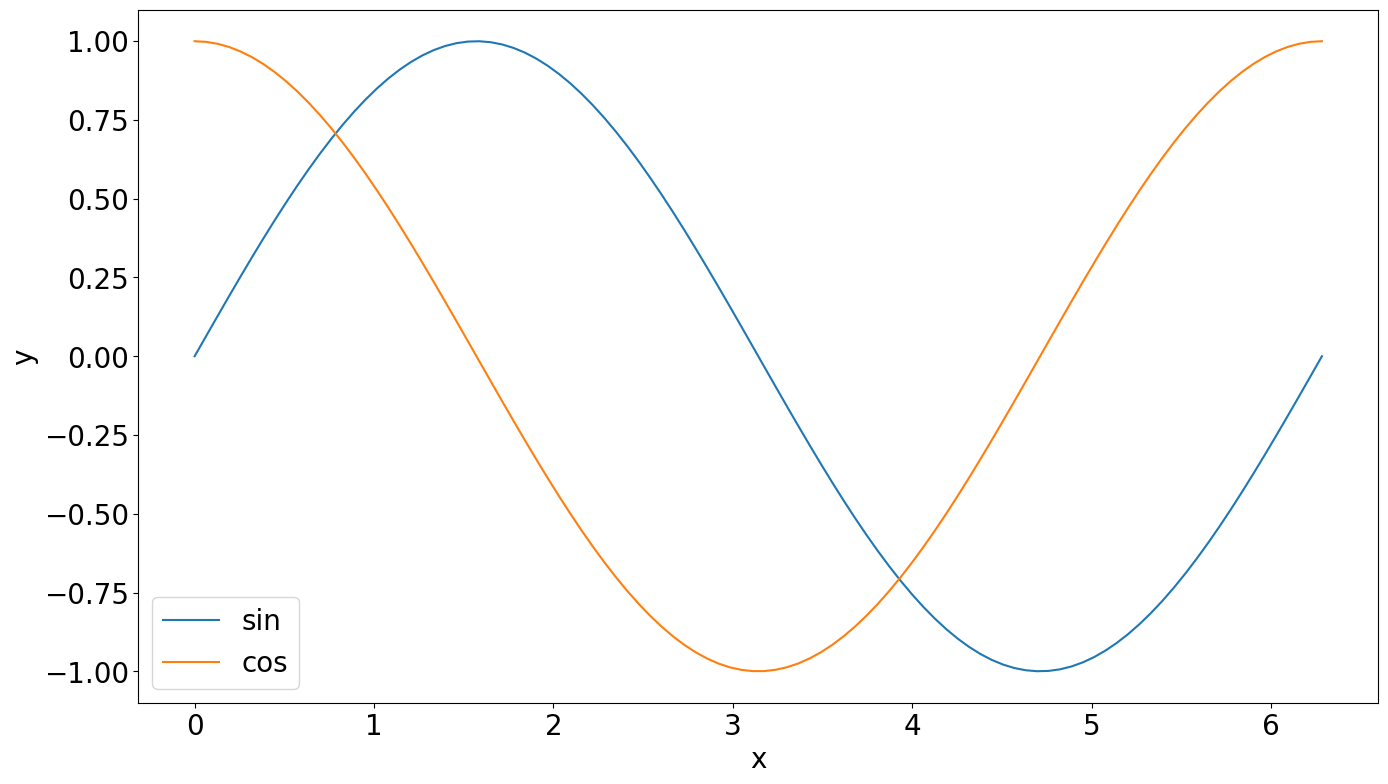

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(16,9))
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['sin', 'cos'], fontsize=20) # вместо первого аргумента можно в plot вписать аргумент label
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.gca().tick_params(labelsize=20)

Познакомимся с другим популярным видом графиков: гистограммой. Гистограмма &mdash; это один из способов визуализации данных. По сути она отражает распределение данных по некоторым значениям. Чтобы это осознать, разберём несложный пример (*если вы уже разбирали гистограмму на практике по определению возраста скоплений и все поняли &mdash; проходите дальше*).


Скажем, у нас есть некоторый набор данных &mdash; список из 30 чисел от 0 до 10:

In [2]:
a = [1, 2, 4, 6, 9, 10, 4, 5, 8, 1, 4, 5, 9, 7, 0, 1, 4, 0, 6, 3, 6, 2, 5, 8, 4, 9, 2, 0, 1, 4]
len(a) # показывает длину списка

30

Мы озадачились вопросом: как часто в нашем списке встречается число 5? Конечно, можно просто глазами пробежаться по списку и посчитать. Либо использовать метод `.count()`:

In [3]:
a.count(5) # если захотите использовать этот метод в дальнейшем, учтите, что он работает только с целыми числами,
           # то есть с переменными типа int

3

Но что если мы хотим узнать частоту появлений для каждого числа? И наглядно увидеть, какие встречаются чаще, а какие реже? В этом случае мы используем гистограмму.

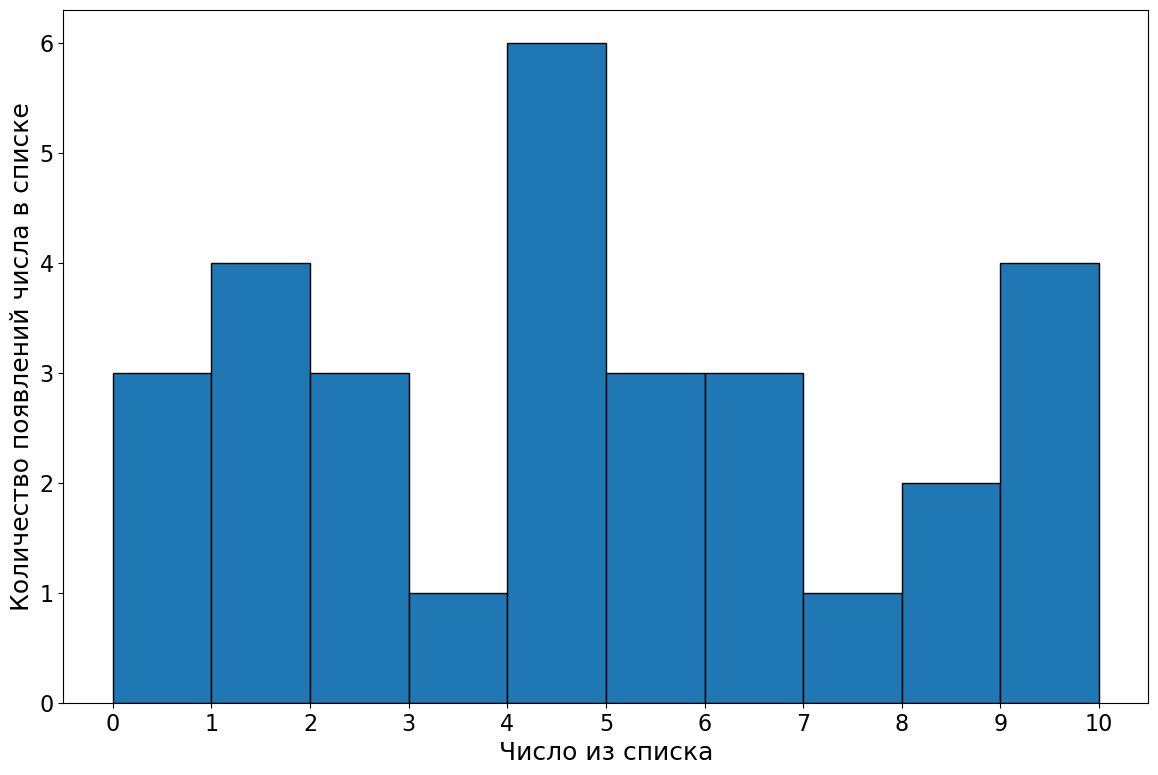

In [4]:
plt.figure(figsize=(14,9))
plt.hist(a, 10, edgecolor='black') # эта функция строит гистограмму по заданному массиву данных
                                   # 10 здесь - это количество бинов (о них пойдёт речь далее)
                                   # edgecolor рисует линии по границам прямоугольников гистограммы
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # передаём список чисел, которые хотим видеть по оси Х
plt.xlabel('Число из списка', fontsize=18)
plt.ylabel('Количество появлений числа в списке', fontsize=18)
plt.gca().tick_params(labelsize=16)
plt.show()

Первая колонка отражает, сколько с нашем списке нулей &mdash; 3 штуки. Соответственно единичек &mdash; 4 штуки и т.д. Минимальное количество появлений &mdash; у чисел 3 и 7, максимальное &mdash; у числа 4. 

В нашем примере на гистограмме отражалось количество появлений отдельных чисел. Но бывает, например, что в списке есть числа от 0 до 100 и нам нужно посмотреть частоту появлений на некотором промежутке, скажем от 30 до 40. Тогда нам не очень удобно строить гистограмму по появлению каждого отдельного числа, а потом суммировать значения для чисел 30, 31, 32, ..., 40. Гораздо проще сразу выбрать разбиение по десяткам:
![hist](Images/histnorm.png)

Здесь сразу видно, что числа от 30 до 40 встретились в списке примерно 13 раз.\
Также гистограмма наглядно показывает, какие числа встречаются наиболее часто (в данном примере это промежуток от 50 до 60). Это бывает полезно для простого статистического анализа данных.

Длину интервалов (или по-другому *бинов*), как и их количество, можно выбирать самостоятельно. Чаще всего задаётся именно количество бинов, а длина их подбирается так, чтобы все прямоугольники на гистограмме были одинаковой ширины.

Суммируя вышесказанное, **построение гистограммы происходит следующим образом**:
1. Задаётся количество бинов (например, 10).
2. В списке ищется максимальное и минимальное значение (например, 0 и 100).
3. Высчитывается длина интервалов: разность между максимумом и минимумом делится на количество бинов ($\frac{100-0}{10}=10$).
4. Подсчитывается, сколько элементов списка попадает в каждый из промежутков (например, в интервал от 0 до 10 попадает 4 элемента, от 10 до 20 &mdash; 3 элемента и т.д.)

Количество бинов задаётся в функции `plt.hist()` аргументом `bins`. Можно не указывать название аргумента, а просто писать требуемое число через запятую после массива данных.

In [ ]:
dataset = np.random.randn(1000) # эту строчку понимать не обязательно
# Попробуйте построить гистограмму для этого датасета
# Попробуйте разные значения bins

## Скаттерплот

Еще один тип графиков, который бывает довольно полезно &mdash; `scatterplot`. В самом просто случае это обычный plot:

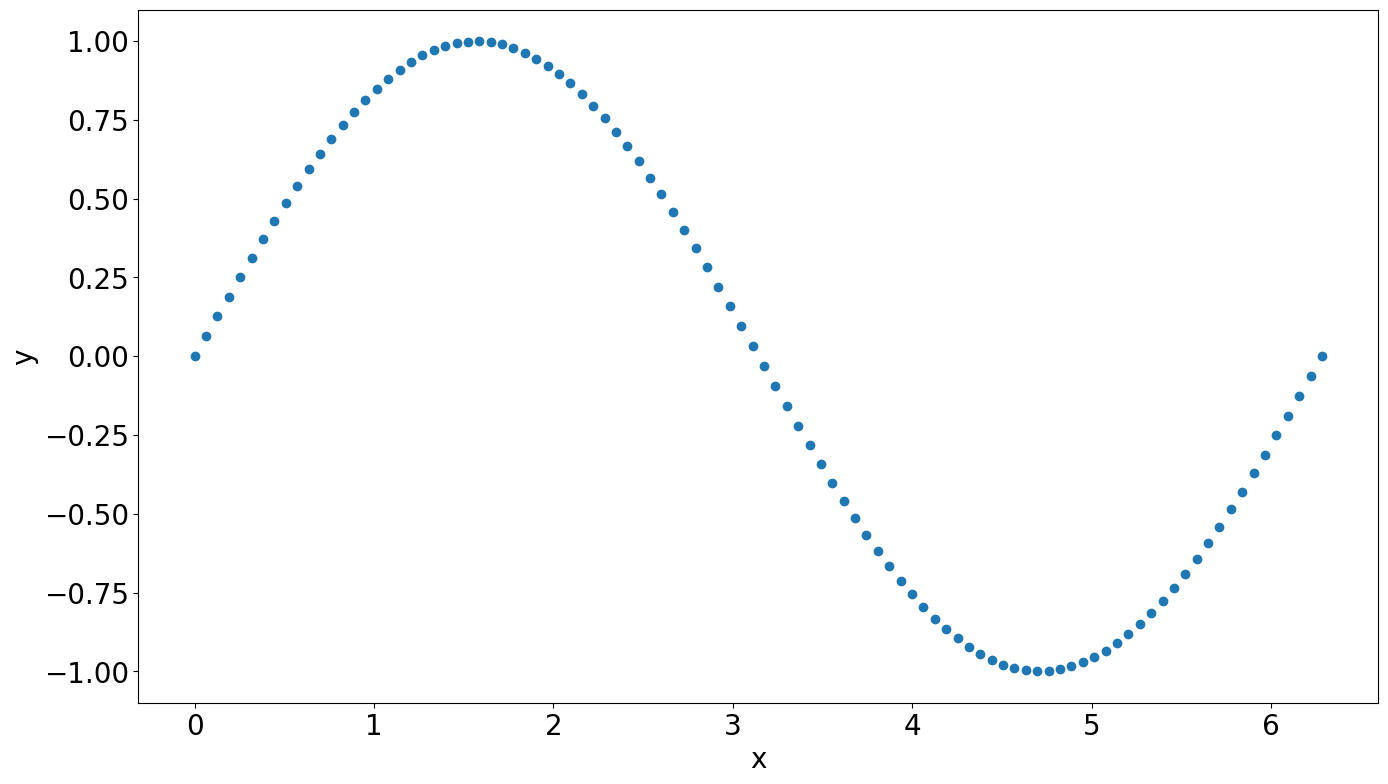

In [8]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.figure(figsize=(16, 9))
plt.scatter(x, y)

plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.gca().tick_params(labelsize=20)

Все очень похоже, только вместо линий соединяющих точки данных у нас просто точки. Однако, `scatter` может рисовать не только пары значений `x` и `y`, но и `x`, `y` и `z`. Как же мы будем отображать `z`? Цветом! Давайте попробуем:

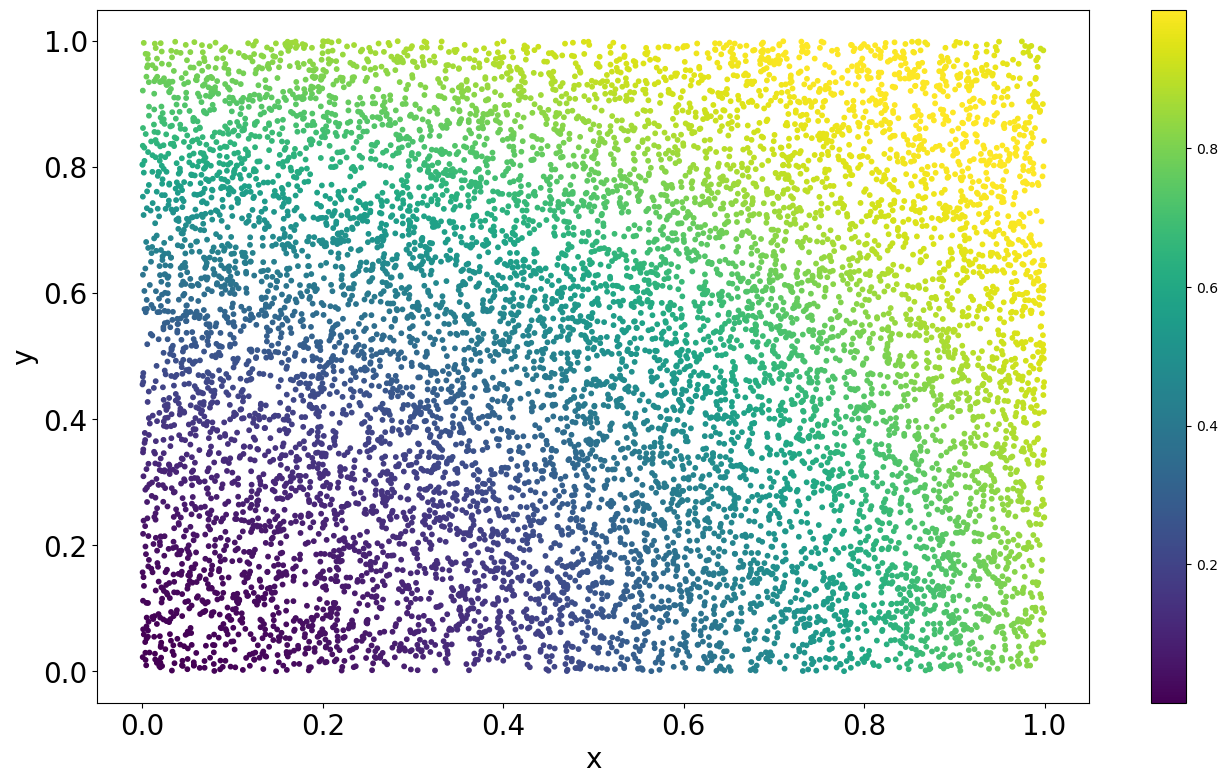

In [10]:
x = np.random.rand(10000,1)
y = np.random.rand(10000,1)

z = np.sin(x**2 + y**2) 

plt.figure(figsize=(16, 9))
plt.scatter(x, y, c=z, s=10) # c=z означает, что z будет задавать цвет точки
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.gca().tick_params(labelsize=20)
plt.colorbar() # добавляем цветовую шкалу


Это один из способов отображать данные с тремя осями. Этот способ чаще всего используется когда у нас нету структурированных данных, а есть только набор точек вида `(x_i, y_i, z_i)`.


Сгенерируем данные немного другие данные, добавим сюда шум:

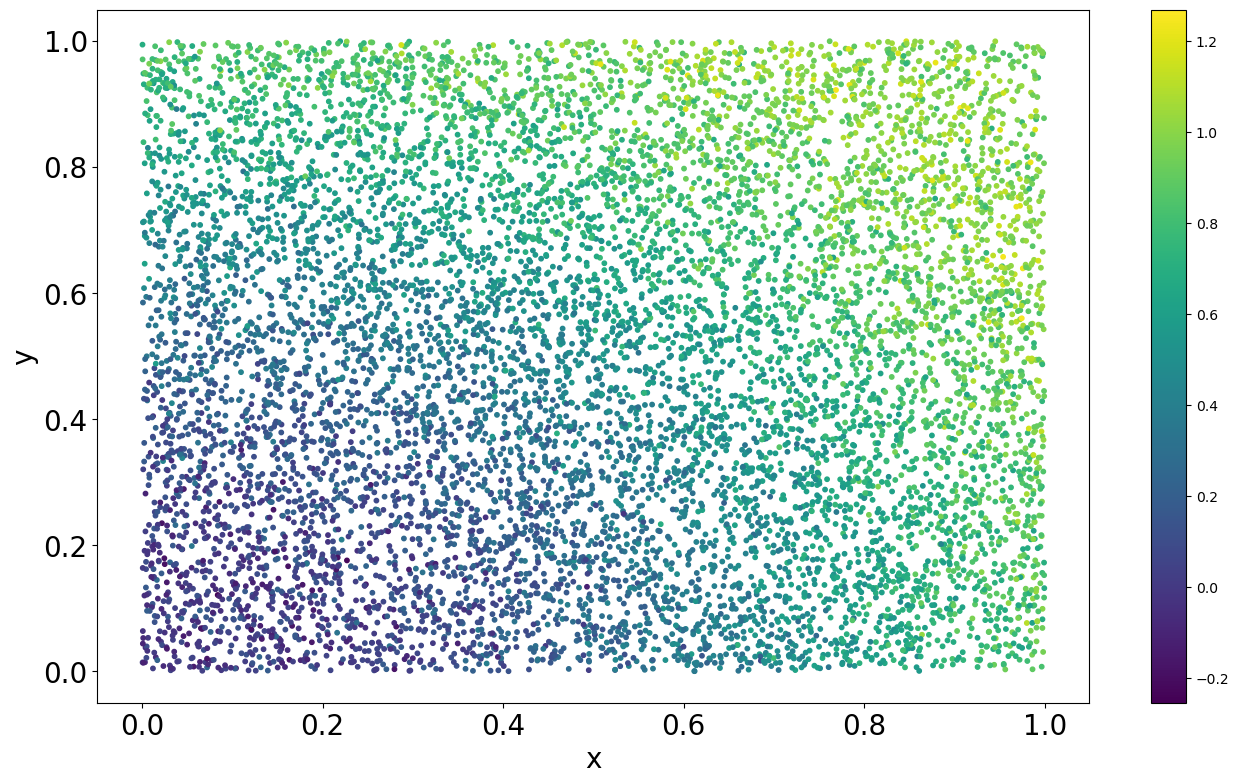

In [11]:
x = np.random.rand(10000,1)
y = np.random.rand(10000,1)

z = np.sin(x**2 + y**2) + 0.1*np.random.randn(len(x), 1) # не обязательно это понимать

plt.figure(figsize=(16, 9))
plt.scatter(x, y, c=z, s=10) # c=z означает, что z будет задавать цвет точки
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.gca().tick_params(labelsize=20)
plt.colorbar() # добавляем цветовую шкалу


Специально случайный редкий шум, который будет сильно выше данных. Такой шум называется *выбросами* или *аутлаерами*:

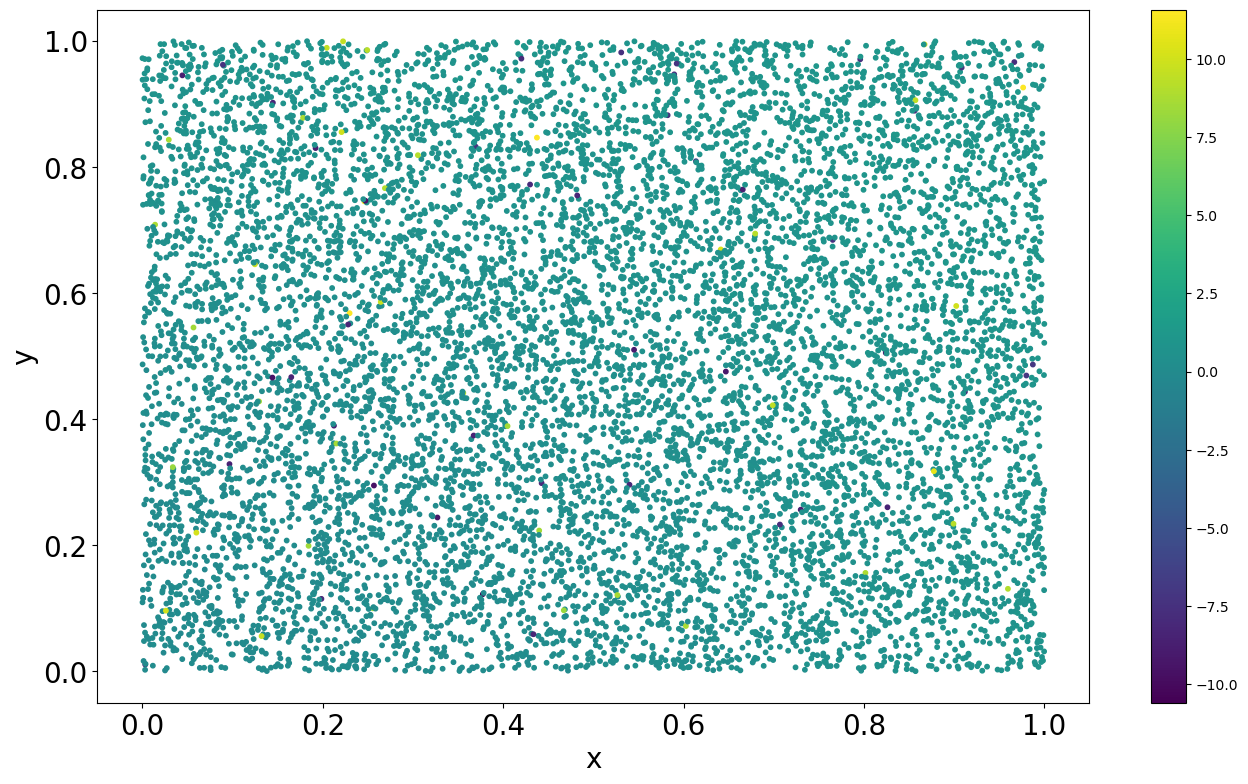

In [12]:
x = np.random.rand(10000,1)
y = np.random.rand(10000,1)

noise = 3*np.random.randn(len(x), 1)
noise[np.abs(noise) < 8] = 0

z = np.sin(x**2 + y**2) + 0.1*np.random.randn(len(x), 1) + noise

plt.figure(figsize=(16, 9))
plt.scatter(x, y, c=z, s=10) # c=z означает, что z будет задавать цвет точки
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.gca().tick_params(labelsize=20)
plt.colorbar() # добавляем цветовую шкалу

А куда пропала зависимость из данных? Дело в том что такие выбросы очень влияют на визуализацию. По сути шкала цвета (`colorbar`) отображает самым темным/светлым цветом самые маленькие/большие значения в данных, которых у нас всего чуть-чуть. Есть три способа с этим бороться:
- Убрать выбросы из данных (сложно)
- Поменять границы отображения цвета (просто)
- Использовать логарифмическую шкалу по цвету (просто, но не сразу понятно + работает только для положительных значений)


Посмотрим только на два последних метода. Для начала поменяем границы отображения цвета. Для этого воспользуемся аргументом `vmin` и `vmax` в `plt.scatter`. Посмотрим на результат:

In [ ]:
plt.figure(figsize=(16, 9))
plt.scatter(x, y, c=z, s=10, vmin=, vmax=) # подберите значения для vmin и vmax
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.gca().tick_params(labelsize=20)
plt.colorbar() # добавляем цветовую шка


Теперь попробуем прологарифмировать колорбар:

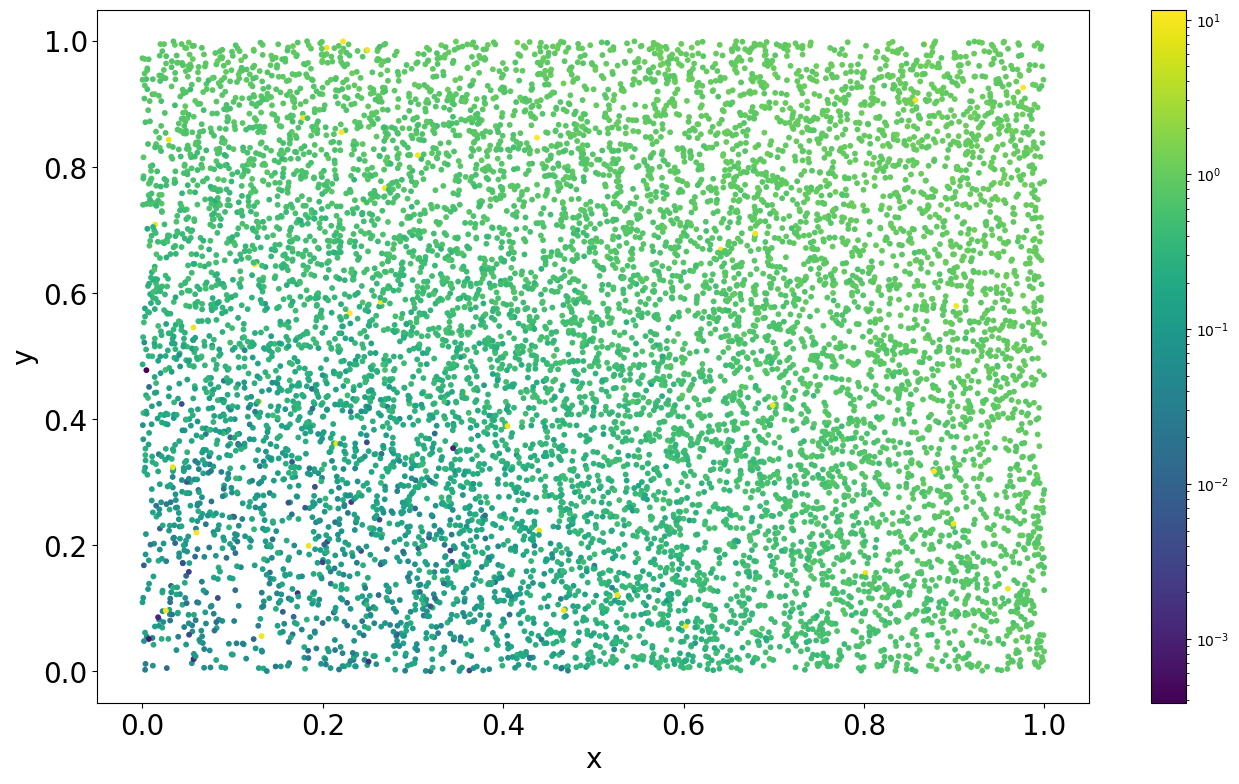

In [13]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(16, 9))
plt.scatter(x, y, c=z, s=10, norm=LogNorm()) # c=z означает, что z будет задавать цвет точки
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.gca().tick_params(labelsize=20)
plt.colorbar() # добавляем цветовую шкалу

✨✨✨ **Дополнительное задание:** Напишите программу, которая бы искала и удаляла все *выбросы* из данных. Убедитесь, что программа работает для любых значений средних значений. Недостаточно будет просто убрать значения `> 8` и `< -8` 

In [14]:
# Ваш код

## Линейная регрессия

Мы разобрались с построение картинок, освоим последний в нашем курсе большой инструмент работы с данными &mdash; регрессию. Регрессия это метод, который позволяет определить параметры известной нам функции чтобы наиболее точно описать наши данные. **Более простыми словами это такая штука, которая сама за нас крутит параметры нашей функции, чтобы подогнать ее под наши (корявые) данные.**


Сначала мы посмотрим на **самый простой** и **самый важный случай**. Представим, что у нас есть данные, которые хорошо ложатся на прямую вида `y = kx + b`. Зная данные `x` и `y` мы можем найти с помощью формулы (!) коэффициенты `k` и `b` и построить нашу прямую. 


Мы не будем [выводить эту формулу](https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/13/lecture-13.pdf), но я опишу основную идею. В любой регрессии мы пытаемся минимизировать ошибку, то есть разницу между реальными данными и прямой, коэфициенты которой мы ищем. В большинстве случае мы будем минимизировать сумму квадратов разницы:

$$\sum_{i=1}^n \Delta y_i= \sum_{i=1}^n (y_i - (kx_i + b))^2 \rightarrow min$$

![](Images/regression.png)

Удивительно, но можно получить формулу для этих коэффициентов:

$$
k = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n}(x_i-\overline{x})^2}
$$
$$
b = \overline{y} - k\overline{x}
$$

где $\overline{x}$ и $\overline{y}$ - средние значения $x$ и $y$ соответственно, а $\sum_{i=1}^{n}$ - сумма от $i=1$ до $n$.

Напишите программу, ищущую коэффициенты $k$ и $b$ по формулам выше.

Используя полученную (или взятую из ответа) формулу, давайте попробуем провести прямую для данных, которые мы загружали в предыдущем занятии:

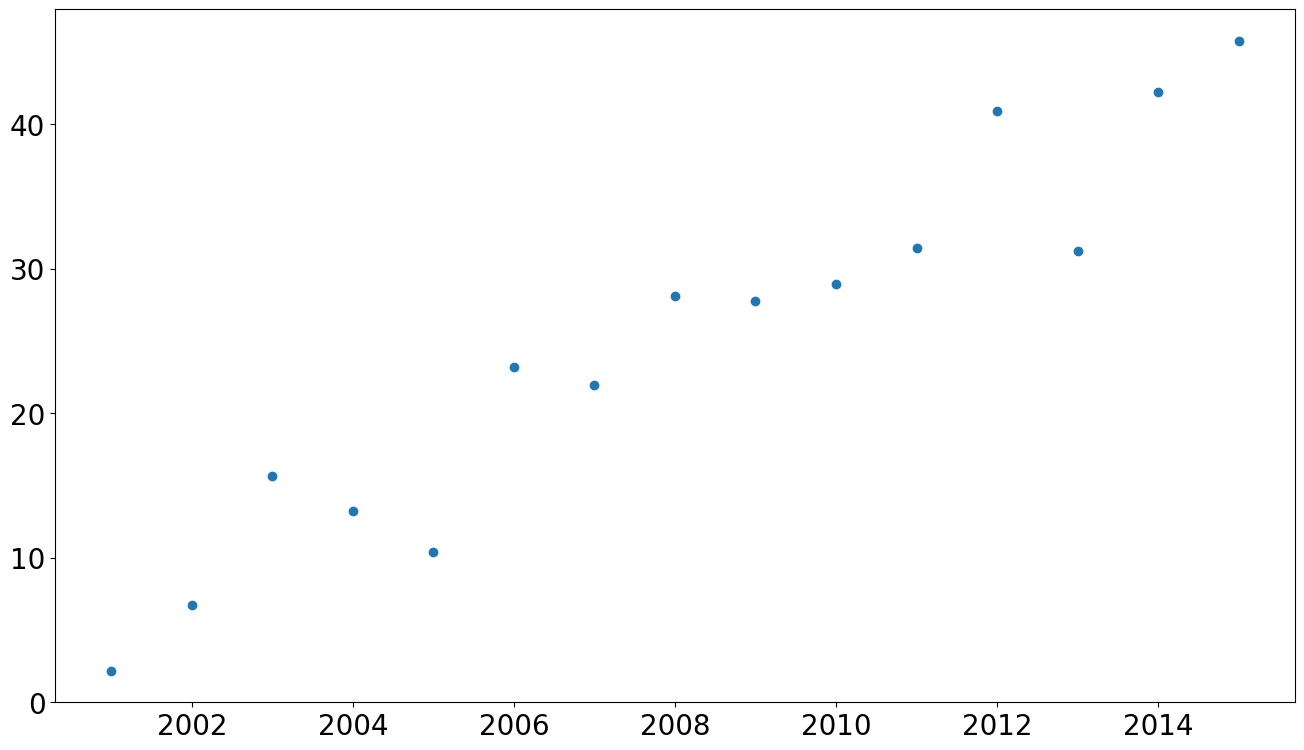

In [18]:
from lksh import load_data

x, y = np.loadtxt('data/lab.txt', unpack=True) 
k  = 
b  = 

plt.figure(figsize=(16, 9))
plt.scatter(x, y)
plt.gca().tick_params(labelsize=20)
# проведите прямую

✨✨ **Дополнительное задание:** Используя формулы [отсюда](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2#%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80_%E2%80%94_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0_%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D1%85_%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9) получите решение в матричном виде.



<p>
<details>
<summary> <b> Подсказка: </b> вам понадобятся следующие понятия (кликните чтобы посмотреть):   </summary>


> - `@` &mdash; векторное произведение
> - `.T` &mdash; транспонирование матрицы
> - `np.linalg.inv()` &mdash; функция для нахождения обратной матрицы
> - Матрицу A необходимо взять в виде:
> ``` python
> A = np.ones((len(x), 2))
> A[:, 1] = x
> ```
</details>
</p>


In [42]:
# Ваш код

Остался последний рывок! Что делать, если наша функция не линейная зависимость? В абсолютном большинстве случаев нет никакой формулы, которая бы нам помогла. Но зато есть замечательный алгоритм, который нам в этом поможет: 

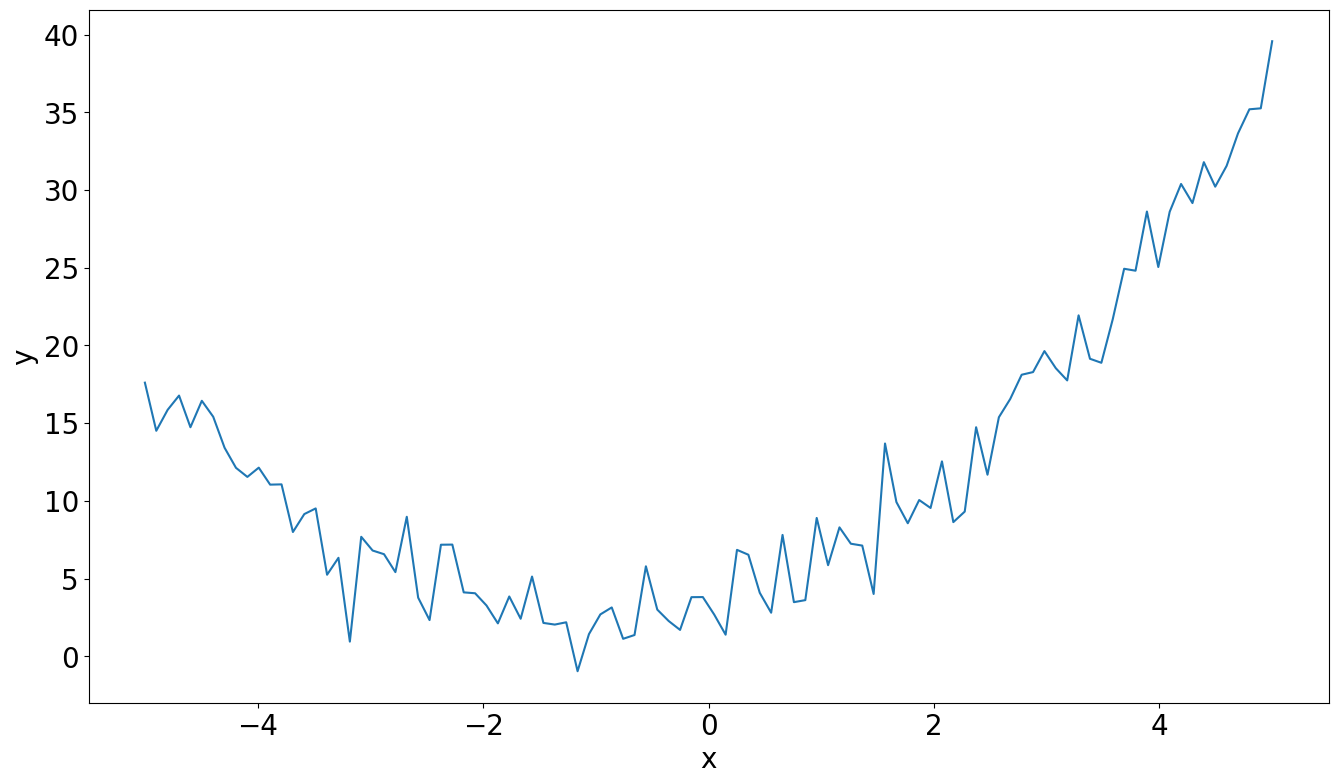

In [43]:
def func(x, a, b, c):
    return a*x**2 + b*x + c

noise = np.random.randn(100)*2 # добавим шума (100 значений)
x = np.linspace(-5, 5, 100)
y = func(x, 1, 2, 3) + noise


plt.figure(figsize=(16, 9))
plt.plot(x, y)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.gca().tick_params(labelsize=20)

Попробуем найти параметры исходной функции с помощью функции `curve_fit` из библиотеки `scipy.optimize`. `curve_fit` принимает на вход функцию, которую мы хотим аппроксимировать, и массивы `x` и `y` с данными. Возвращает она массив параметров, которые нужно подставить в функцию, чтобы получить искомую функцию: 

In [46]:
from scipy.optimize import curve_fit

params, сov = curve_fit(func, x, y)

print('Исходные параметры: ', [1, 2 ,3])
print('Получившиеся параметры: ', params)

Исходные параметры:  [1, 2, 3]
Получившиеся параметры:  [0.97615864 1.93220213 3.32277389]


Весьма точно! Посмотрим как это выглядит: нужно подставить получившиеся параметры в функцию.

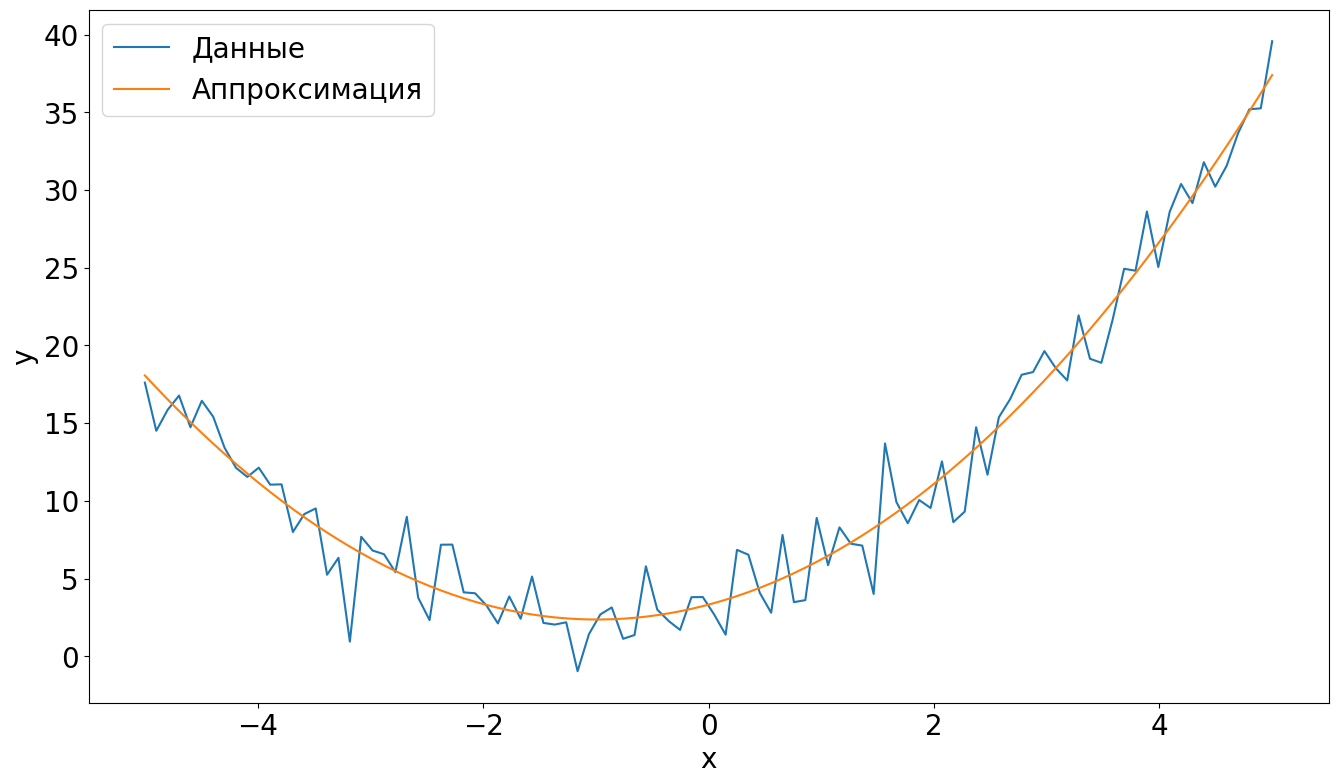

In [45]:
plt.figure(figsize=(16, 9))
plt.plot(x, y)
plt.plot(x, func(x, params[0], params[1], params[2])) # можно еще так: plot(x, func(x, *params))
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.gca().tick_params(labelsize=20)

plt.legend(['Данные', 'Аппроксимация'], fontsize=20)


✨✨✨ **Дополнительное задание:** с помощью `сov` (матрицы ковариации) можно получить ошибки найденных параметров (`sigma = np.sqrt(np.diag(cov))`). Нарисуйте дополнительно две функции: одну параметры + ошибка, а другую параметры - ошибка. 

Если ожидаемые параметры функции находятся очень далеко от единицы, то алгоритм может найти не подходящие параметы. Для этого мы подсказываем его откуда стоит идти и даем изначальный вектор параметров `p0`:

In [ ]:
from scipy.optimize import curve_fit

params, _ = curve_fit(func, x, y, p0=[1, 1, 1])

print('Исходные параметры: ', [1, 2 ,3])
print('Получившиеся параметры: ', params)

Исходные параметры:  [1, 2, 3]
Получившиеся параметры:  [1.01679163 2.00609286 2.73863192]
